## Main Jupyter Notebooks for implementing the German Traffic Sign Classification CNN

# Read in Data

In [1]:
# Imports 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
import os
import matplotlib.pyplot as plt

In [2]:
# Gibt an, ob wir auf einer GPU oder CPU trainieren 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
# Hier wird unser mean und unser std für die Normalisierung der Bilder berechnet
# dataset = ImageFolder("GTSRB\Final_Training\Images", transform=transforms.ToTensor())
dataset = ImageFolder("GTSRB/Final_Training/Images", transform=transforms.ToTensor())
loader = DataLoader(dataset, batch_size=64, shuffle=False)

mean = 0.
std = 0.
total_images_count = 0

for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images_count += batch_samples

mean /= total_images_count
std /= total_images_count

print(f"Mean: {mean}")
print(f"Std: {std}")


Mean: tensor([0.3433, 0.3151, 0.3253])
Std: tensor([0.1690, 0.1713, 0.1815])


In [4]:
# transform definieren zum Einlesen der Test- und Trainingsdaten
transform = transforms.Compose([
    transforms.Resize((35, 35)),  
    transforms.ToTensor(),
    transforms.Normalize(mean.tolist(), std.tolist()) 
])

train_transforms = transforms.Compose([
    transforms.Resize((35, 35)),
    transforms.RandomRotation(20),  # Zufällige Rotation um ±20 Grad
    transforms.RandomResizedCrop(35, scale=(0.8, 1.0)),  # Zufälliges Zuschneiden und Skalieren
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Helligkeit und Farbvariation
    transforms.RandomHorizontalFlip(),  # Zufälliges horizontales Spiegeln
    transforms.ToTensor(),  # Umwandlung zu einem Tensor
    transforms.Normalize(mean.tolist(), std.tolist())  # Normalisierung
])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2651944..2.5399241].


Label: 100_kmh


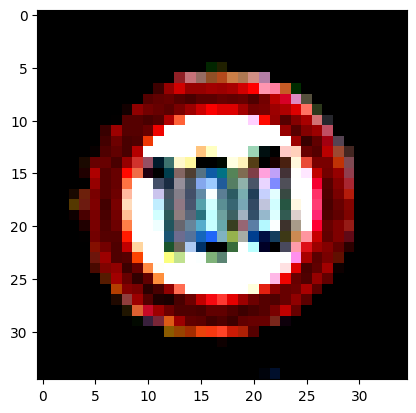

In [35]:
# Einlesen der Daten und anschließende Ausgabe eines Bildes inkl. Label zur überprüfung
train_dataset = ImageFolder(root='GTSRB/Final_Training/Images', transform=transform)
train_transforms_dataset = ImageFolder(root='GTSRB/Final_Training/Images', transform=train_transforms)

test_dataset = ImageFolder(root='GTSRB/Final_Test/Images', transform=transform)

batch_size = 64
test_loader = DataLoader(test_dataset, batch_size= batch_size, shuffle=True)
train_transforms_loader = DataLoader(train_transforms_dataset, batch_size= batch_size, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size= batch_size, shuffle=True)
num_classes = 43
# --------- Testing ---------
img, label = train_dataset[2]
label_string = test_dataset.classes[label]
print("Label:", label_string)
plt.imshow(img.permute(1, 2, 0))
#print(img)


# Create the Model


In [15]:
# Definieren unseres CNN Model
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=4, padding=1)
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.conv_layer2 = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=4, padding=1)
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.conv_layer3 = nn.Conv2d(in_channels=192, out_channels=384, kernel_size=4, padding=1)
        self.relu3 = nn.ReLU()

        self.conv_layer4 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=4, padding=1)
        self.relu4 = nn.ReLU()

        self.conv_layer5 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=4, padding=1)
        self.relu5 = nn.ReLU()
        self.max_pool5 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.dropout6 = nn.Dropout(p=0.5)
        
        
        self.fc6 = nn.Linear(128, 512) 
        self.relu6 = nn.ReLU()
        self.dropout7 = nn.Dropout(p=0.5)
        self.fc7 = nn.Linear(512, 256)
        self.relu7 = nn.ReLU()

        self.dropout8 = nn.Dropout(p=0.5)
        self.fc8 = nn.Linear(256, 128)
        self.relu8 = nn.ReLU()


        self.fc9 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.relu1(out)
        out = self.max_pool1(out)

        out = self.conv_layer2(out)
        out = self.relu2(out)
        out = self.max_pool2(out)

        out = self.conv_layer3(out)
        out = self.relu3(out)

        out = self.conv_layer4(out)
        out = self.relu4(out)

        out = self.conv_layer5(out)
        out = self.relu5(out)
        out = self.max_pool5(out)

        out = out.reshape(out.size(0), -1)
        out = self.dropout6(out)
        out = self.fc6(out)
        out = self.relu6(out)

        out = self.dropout7(out)
        out = self.fc7(out)
        out = self.relu7(out)

        out = self.dropout8(out)
        out = self.fc8(out)
        out = self.relu8(out)

        out = self.fc9(out)

        return out

### Different CNN Model

In [ ]:
# Anderes CNN definieren zum Testen
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(32)
        
        self.pool1 = nn.MaxPool2d(2, 2)
        self.bn3 = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, kernel_size=2)
        self.bn4 = nn.BatchNorm2d(64)
        
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.2)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(64 * 7 * 7, 750) 
        self.bn5 = nn.BatchNorm1d(750)
        self.dropout2 = nn.Dropout(0.4)
        
        self.fc2 = nn.Linear(750, 256)
        self.bn6 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(256, 43)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(self.bn3(x))
        
        x = F.relu(self.bn4(self.conv3(x)))
        x = self.pool2(x)
        x = self.dropout1(x)
        
        x = self.flatten(x)
        
        x = F.relu(self.bn5(self.fc1(x)))
        x = self.dropout2(x)
        
        x = F.relu(self.bn6(self.fc2(x)))
        x = self.dropout3(x)
        
        x = F.softmax(self.fc3(x), dim=1)
        return x


# Training

### Initialization of the model and definition of hyperparameters


In [ ]:
# Initialisierung des Modells
model = CNN(num_classes).to(device)
loss_func = nn.CrossEntropyLoss()

# Initiale Lernrate und Optimizer
lr = 0.01
weight_decay = 0.001
#optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
optimizer = optim.SGD(model.parameters(), lr=lr)

# ReduceLROnPlateau Scheduler
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, threshold=0.001)

### Initialization of the model and definition of hyperparameters for the Training Loop


In [ ]:
def training_loop(lr, weight_decay, threshold):
    # Initialisierung des Modells
    model = CNN(num_classes).to(device)
    loss_func = nn.CrossEntropyLoss()

    # Initiale Lernrate und Optimizer
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

    # ReduceLROnPlateau Scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, threshold=threshold, verbose=True)
    return model, loss_func, optimizer, scheduler

### Calculate Accuracy Function

In [12]:
def calculate_accuracy(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    
    with torch.no_grad():  # No gradient computation
        for data in data_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the index of the maximum value in the output
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy

### Default Training

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}")
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = loss_func(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Save model
torch.save(model.state_dict(), 'model/new_cnn_architecture.pth')

### Test model with accuracy plot

#### Get the Activation of the Model Layers 

In [33]:
# Dictionary to store activations
activations = {}

# Hook function to capture the outputs
def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

# Initialize the model
model = CNN(num_classes=43)
model.to(device)
# Initiale Lernrate und Optimizer
loss_func = nn.CrossEntropyLoss()
lr = 0.01
weight_decay = 0.001
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
#optimizer = optim.SGD(model.parameters(), lr=lr)

# Register hooks to capture activations from convolutional and fully connected layers
model.conv_layer1.register_forward_hook(get_activation('conv_layer1'))
model.conv_layer2.register_forward_hook(get_activation('conv_layer2'))
model.conv_layer3.register_forward_hook(get_activation('conv_layer3'))
model.conv_layer4.register_forward_hook(get_activation('conv_layer4'))
model.conv_layer5.register_forward_hook(get_activation('conv_layer5'))

# Register hooks for ReLU activations
model.relu1.register_forward_hook(get_activation('relu1'))
model.relu2.register_forward_hook(get_activation('relu2'))
model.relu3.register_forward_hook(get_activation('relu3'))
model.relu4.register_forward_hook(get_activation('relu4'))
model.relu5.register_forward_hook(get_activation('relu5'))

# Register hooks for fully connected layers
model.fc6.register_forward_hook(get_activation('fc6'))
model.fc7.register_forward_hook(get_activation('fc7'))
model.fc8.register_forward_hook(get_activation('fc8'))
model.fc9.register_forward_hook(get_activation('fc9'))

# Register hooks for ReLU activations in fully connected layers
model.relu6.register_forward_hook(get_activation('relu6'))
model.relu7.register_forward_hook(get_activation('relu7'))
model.relu8.register_forward_hook(get_activation('relu8'))


### Train the Model with Plot of the Accuracy each epoch 

In [29]:
num_epochs = 20
train_accuracies = []
test_accuracies = []
train_losses = []

# Initialize the plot
plt.figure(figsize=(10, 6))

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    model.train()
    running_loss = 0.0  # Track the loss for the current epoch

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = loss_func(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()  # Accumulate loss

    # Calculate average loss for the current epoch
    avg_loss = running_loss / len(train_loader)

    # Accuracy on training and test data
    train_accuracy = calculate_accuracy(model, train_loader, device)
    test_accuracy = calculate_accuracy(model, test_loader, device)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(avg_loss)

    print(f"Training Loss: {avg_loss:.4f}")
    print(f"Training Accuracy: {train_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    #current_lr =  scheduler.get_last_lr()
    #print(f"Learning Rate: {current_lr}")
    
    
    # Step the scheduler to adjust learning rate based on validation loss (or training loss)
    #scheduler.step(avg_loss)

    # Clear the current plot and update with new data
    plt.clf()  # Clear the figure
    plt.plot(range(1, epoch + 2), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, epoch + 2), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Test Accuracy per Epoch')
    plt.legend()
    plt.grid(True)
    
    # Display the updated plot
    plt.pause(0.1)

# Save the model's weights
torch.save(model.state_dict(), 'model/new_cnn_architecture.pth')

# Show the final plot after all epochs
plt.show()

Epoch 1/20


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

### More Visualization while Training 

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Zusätzliche Listen für neue Visualisierungen
last_layer_weights = []
pca_results = []

num_epochs = 50
train_accuracies = []
test_accuracies = []
train_losses = []

# Initialize the plots
plt.figure(figsize=(12, 8))

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    model.train()
    running_loss = 0.0  # Track the loss for the current epoch

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = loss_func(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()  # Accumulate loss

    # Calculate average loss for the current epoch
    avg_loss = running_loss / len(train_loader)

    # Accuracy on training and test data
    train_accuracy = calculate_accuracy(model, train_loader, device)
    test_accuracy = calculate_accuracy(model, test_loader, device)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(avg_loss)

    print(f"Training Loss: {avg_loss:.4f}")
    print(f"Training Accuracy: {train_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    # Visualisierung der Gewichte der letzten Schicht (vor dem Output Layer)
    last_fc_weights = model.fc9.weight.data.cpu().numpy()
    last_layer_weights.append(last_fc_weights)

    # PCA auf die Output-Vektoren anwenden
    pca = PCA(n_components=2)
    outputs_2d = pca.fit_transform(outputs.detach().cpu().numpy())
    pca_results.append(outputs_2d)

    # Visualisierungen aktualisieren
    plt.clf()  # Clear the figure

    # Plot 1: Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(range(1, epoch + 2), train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(range(1, epoch + 2), test_accuracies, label='Test Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Test Accuracy per Epoch')
    plt.legend()
    plt.grid(True)

    # Plot 2: Loss
    plt.subplot(2, 2, 2)
    plt.plot(range(1, epoch + 2), train_losses, label='Training Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss per Epoch')
    plt.legend()
    plt.grid(True)

    # Plot 3: PCA der Outputs
    plt.subplot(2, 2, 3)
    plt.scatter(outputs_2d[:, 0], outputs_2d[:, 1], c=labels.cpu().numpy(), cmap='viridis', s=10)
    plt.colorbar(label='Class Index')
    plt.title('PCA of Output Vectors')
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')

    # Plot 4: Visualisierung der letzten Layer-Gewichte
    plt.subplot(2, 2, 4)
    plt.imshow(last_fc_weights, cmap='coolwarm', aspect='auto')
    plt.colorbar(label='Weight Value')
    plt.title('Weights of Last FC Layer')
    plt.xlabel('Neurons')
    plt.ylabel('Classes')

    # Display the updated plot
    plt.tight_layout()
    plt.pause(0.1)

# Save the model's weights
torch.save(model.state_dict(), f'model/gute_modell.pth')
torch.save(model.state_dict(), f'model/train_{train_accuracy}_test_{test_accuracy}.pth')

# Show the final plot after all epochs
plt.show()


### Run For Loop

In [ ]:
def mode_train(lr, weight_decay, threshold):
    # Training starten (Stellen Sie sicher, dass die Funktion training_loop richtig definiert ist)
    model, loss_func, optimizer, scheduler = training_loop(lr, weight_decay, threshold)
    print("----------------------------------------")
    print(f"Start training the model with:\n lr: {lr} \n weight_decay: {weight_decay} \n threshold: {threshold}")
    print("----------------------------------------")
    num_epochs = 80
    train_accuracies = []
    test_accuracies = []
    train_losses = []

    # Initialisiere das Plot
    plt.figure(figsize=(10, 6))

    # Ordner für gespeicherte Modelle und Bilder erstellen, falls nicht vorhanden
    os.makedirs('img', exist_ok=True)
    os.makedirs('model', exist_ok=True)

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        model.train()
        running_loss = 0.0  # Verfolge den Verlust für die aktuelle Epoche

        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()  # Lösche die vorherigen Gradienten
            outputs = model(images)  # Vorwärtsdurchlauf
            loss = loss_func(outputs, labels)  # Verlust berechnen
            loss.backward()  # Rückwärtsdurchlauf
            optimizer.step()  # Gewicht anpassen
            
            running_loss += loss.item()  # Verlust akkumulieren

        # Durchschnittlichen Verlust für die aktuelle Epoche berechnen
        avg_loss = running_loss / len(train_loader)

        # Genauigkeit auf Trainings- und Testdaten berechnen
        train_accuracy = calculate_accuracy(model, train_loader, device)
        test_accuracy = calculate_accuracy(model, test_loader, device)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        train_losses.append(avg_loss)

        print(f"Training Loss: {avg_loss:.4f}")
        print(f"Training Accuracy: {train_accuracy:.2f}%")
        print(f"Test Accuracy: {test_accuracy:.2f}%")
        current_lr = scheduler.get_last_lr()
        print(f"Learning Rate: {current_lr}")
        
        # Den Scheduler nach dem Training der aktuellen Epoche anpassen
        scheduler.step(avg_loss)

        # Plot mit den aktuellen Daten aktualisieren
        plt.clf()  # Figur löschen
        plt.plot(range(1, epoch + 2), train_accuracies, label='Training Accuracy')
        plt.plot(range(1, epoch + 2), test_accuracies, label='Test Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title(f'LR: {lr}, WD: {weight_decay}, Th: {threshold} - Training and Test Accuracy per Epoch')
        plt.legend()
        plt.grid(True)
        if(epoch == num_epochs -1):
            # Speicher den Plot im 'img' Ordner mit dem entsprechenden Dateinamen
            plot_filename = f'img/plot_lr_{lr}_wd_{weight_decay}_th_{threshold}.png'
            plt.savefig(plot_filename)
        
        # Zeige den aktualisierten Plot
        plt.pause(0.1)

    # Speicher das Modell im 'model' Ordner mit dem entsprechenden Dateinamen
    model_filename = f'model/model_lr_{lr}_wd_{weight_decay}_th_{threshold}.pth'
    torch.save(model.state_dict(), model_filename)

    # Zeige das finale Plot nach allen Epochen
    plt.show()

In [ ]:
# Definiere die Hyperparameter-Werte
learning_rates = [0.01, 0.005, 0.001]
weight_decays = [0.0001, 0.0007, 0.001, 0.005]
thresholds = [0.1, 0.01, 0.001]

# Schleife über alle Kombinationen
for lr in learning_rates:
    for wd in weight_decays:
        for th in thresholds:
            # Rufe die Mode_train Funktion mit den aktuellen Hyperparametern auf
            mode_train(lr, wd, th)

### Train Code from yt 
(https://www.youtube.com/watch?v=ZBfpkepdZlw)

In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
		# load in the data in batches
    for i, (images, labels) in enumerate(train_loader):  
        # move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # forward propagation
        outputs = model(images)
        loss = loss_func(outputs, labels)
        
        # backward propagation and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # at end of epoch check validation loss and acc
    with torch.no_grad():
      	# switch model to eval (not train) model
        model.eval()
        correct = 0
        total = 0
        all_val_loss = []
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            total += labels.size(0)
            # calculate predictions
            predicted = torch.argmax(outputs, dim=1)
            # calculate actual values
            correct += (predicted == labels).sum().item()
            # calculate the loss
            all_val_loss.append(loss_func(outputs, labels).item())
        # calculate val-loss
        mean_val_loss = sum(all_val_loss) / len(all_val_loss)
        # calculate val-accuracy
        mean_val_acc = 100 * (correct / total)
    print(
        'Epoch [{}/{}], Loss: {:.4f}, Val-loss: {:.4f}, Val-acc: {:.1f}%'.format(
            epoch+1, num_epochs, loss.item(), mean_val_loss, mean_val_acc
        )
    )

# Test the Model

### Test the current Model

In [61]:
def calculate_accuracy(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    
    with torch.no_grad():  # No gradient computation
        for data in data_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the index of the maximum value in the output
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy

# Determine the device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the same device
model.to(device)
# Calculate accuracy on training data
train_accuracy = calculate_accuracy(model, train_loader, device)
print(f"Accuracy on training data: {train_accuracy:.2f}%")

# Calculate accuracy on test data
test_accuracy = calculate_accuracy(model, test_loader, device)
print(f"Accuracy on test data: {test_accuracy:.2f}%")

#torch.save(model.state_dict(), "model/good_models/99_95_and_95_77/training_99_95_test_95_77.pth")


Accuracy on training data: 99.70%
Accuracy on test data: 97.06%


In [ ]:
import torch
import matplotlib.pyplot as plt

# Berechnet die Accuracy pro Klasse, ohne die Anzahl der Klassen als Eingabe zu benötigen
def calculate_class_accuracy(model, data_loader, device):
    model.eval()
    
    # Hole die Anzahl der Klassen und die Klassennamen aus dem Dataset
    class_names = data_loader.dataset.classes
    num_classes = len(class_names)
    
    class_correct = [0] * num_classes
    class_total = [0] * num_classes
    
    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            # Sammle die Richtigkeit der Vorhersagen für jede Klasse
            for i in range(len(labels)):
                label = labels[i].item()
                class_total[label] += 1
                if predicted[i] == labels[i]:
                    class_correct[label] += 1
    
    # Berechne die Accuracy für jede Klasse
    class_accuracy = [100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0 for i in range(num_classes)]
    return class_accuracy, class_names

# Berechne und plotte die Klassenaccuracy nach den 40 Trainingsepochen
class_accuracies, class_names = calculate_class_accuracy(model, test_loader, device)

# Plot Histogramm der Klassenaccuracies mit Klassennamen auf der x-Achse
plt.figure(figsize=(12, 8))
plt.bar(range(len(class_names)), class_accuracies, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Class after Training')
plt.xticks(range(len(class_names)), class_names, rotation=90)  # Setzt die Klassennamen als x-Achsen-Beschriftungen
plt.grid(axis='y')
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
from collections import defaultdict

# Berechnet die Accuracy pro Klasse und speichert falsche Vorhersagen
def calculate_class_accuracy_and_misclassifications(model, data_loader, device):
    model.eval()
    
    # Hole die Anzahl der Klassen und die Klassennamen aus dem Dataset
    class_names = data_loader.dataset.classes
    num_classes = len(class_names)
    
    class_correct = [0] * num_classes
    class_total = [0] * num_classes
    misclassified_counts = defaultdict(lambda: [0] * num_classes)  # Zählt Fehlklassifizierungen je Klasse
    
    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            # Zählt korrekte und fehlerhafte Vorhersagen
            for i in range(len(labels)):
                label = labels[i].item()
                class_total[label] += 1
                if predicted[i] == labels[i]:
                    class_correct[label] += 1
                else:
                    misclassified_counts[label][predicted[i].item()] += 1  # Fehlklassifizierung speichern
    
    # Berechne die Accuracy für jede Klasse
    class_accuracy = [100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0 for i in range(num_classes)]
    return class_accuracy, class_names, misclassified_counts

# Berechne Accuracy und Fehlklassifizierungen
class_accuracies, class_names, misclassified_counts = calculate_class_accuracy_and_misclassifications(model, test_loader, device)

# Erstelle Plots für Klassen mit einer Accuracy < 80%
for i, accuracy in enumerate(class_accuracies):
    if accuracy < 90:
        # Bereite Daten für die Fehlklassifizierungen dieser Klasse auf
        misclassified_counts_for_class = misclassified_counts[i]
        misclassified_class_names = [class_names[j] for j in range(len(misclassified_counts_for_class)) if misclassified_counts_for_class[j] > 0]
        misclassified_class_counts = [misclassified_counts_for_class[j] for j in range(len(misclassified_counts_for_class)) if misclassified_counts_for_class[j] > 0]
        
        # Plot der Fehlklassifizierungen für die Klasse
        plt.figure(figsize=(8, 5))
        plt.bar(misclassified_class_names, misclassified_class_counts, color='salmon')
        plt.xlabel('Predicted Class')
        plt.ylabel('Count')
        plt.title(f"Misclassifications for Class '{class_names[i]}' (Accuracy: {accuracy:.2f}%)")
        plt.xticks(rotation=90)
        plt.grid(axis='y')
        plt.show()


### If you want to test an old model, you can do this right here

Define the CNN Model Class vor Evaluation. Make sure you replace this with the correct Conv Layers and FC Layers of your trained model. 

In [24]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=4, padding=1)
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
 
        self.conv_layer2 = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=4, padding=1)
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
 
        self.conv_layer3 = nn.Conv2d(in_channels=192, out_channels=384, kernel_size=4, padding=1)
        self.relu3 = nn.ReLU()
 
        self.conv_layer4 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=4, padding=1)
        self.relu4 = nn.ReLU()
 
        self.conv_layer5 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=4, padding=1)
        self.relu5 = nn.ReLU()
        self.max_pool5 = nn.MaxPool2d(kernel_size=3, stride=2)
 
        self.dropout6 = nn.Dropout(p=0.5)
 
 
        self.fc6 = nn.Linear(128, 512)
        self.relu6 = nn.ReLU()
        self.dropout7 = nn.Dropout(p=0.5)
        self.fc7 = nn.Linear(512, 256)
        self.relu7 = nn.ReLU()
 
        self.dropout8 = nn.Dropout(p=0.5)
        self.fc8 = nn.Linear(256, 128)
        self.relu8 = nn.ReLU()
 
 
        self.fc9 = nn.Linear(128, num_classes)
 
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.relu1(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer2(out)
        out = self.relu2(out)
        out = self.max_pool2(out)
 
        out = self.conv_layer3(out)
        out = self.relu3(out)
 
        out = self.conv_layer4(out)
        out = self.relu4(out)
 
        out = self.conv_layer5(out)
        out = self.relu5(out)
        out = self.max_pool5(out)
 
        out = out.reshape(out.size(0), -1)
        out = self.dropout6(out)
        out = self.fc6(out)
        out = self.relu6(out)
 
        out = self.dropout7(out)
        out = self.fc7(out)
        out = self.relu7(out)
 
        out = self.dropout8(out)
        out = self.fc8(out)
        out = self.relu8(out)
 
        out = self.fc9(out)
 
        return out

Provide now informations such as path and the number of output classes

In [25]:
model_path = 'model\good_models\with_augmentation\99_1_und_97_06.pth'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Das Modell unter '{model_path}' wurde nicht gefunden.")
 
# Modell laden
trained_model = Net(num_classes=43)
trained_model.to(device)
trained_model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

C:\Users\v814u63\AppData\Local\Temp\ipykernel_18512\242444377.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_model.load_state_dict(torch.load(model_path, map_lo

<All keys matched successfully>

Now you can test your new model

In [29]:
def calculate_accuracy(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    
    with torch.no_grad():  # No gradient computation
        for data in data_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the index of the maximum value in the output
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy

# Determine the device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the same device
trained_model.to(device)
# Calculate accuracy on training data
train_accuracy = calculate_accuracy(trained_model, train_loader, device)
print(f"Accuracy on training data: {train_accuracy:.2f}%")

# Calculate accuracy on test data
test_accuracy = calculate_accuracy(trained_model, test_loader, device)
print(f"Accuracy on test data: {test_accuracy:.2f}%")

Accuracy on training data: 99.70%
Accuracy on test data: 97.06%


# Visualisation and Explainable Part 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6596274..3.716739].


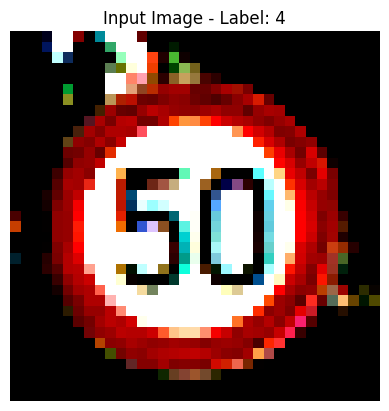

In [30]:
# Get a batch of test images
images, labels = next(iter(test_loader))

# Select a random or specific image by changing the index
rand = 9  # Ändere die Zahl hier, um ein anderes Bild anzuzeigen
image = images[rand:rand+1]
label = labels[rand]
image = image.to(device)
label = label.to(device)

# Display the input image
plt.imshow(image[0].permute(1, 2, 0).cpu())  # Bild vom Tensor in NumPy-Format umwandeln
plt.title(f'Input Image - Label: {label.item()}')
plt.axis('off')
plt.show()


In [31]:
# Reset the activations dictionary
activations = {}
# Ensure hooks are registered (they should be from earlier)
# Run the model on the sample image
output = model(image)
print(activations)


{'conv_layer1': tensor([[[[ 0.3754,  0.6226,  0.1182,  ...,  0.5933,  0.7147,  0.5334],
          [ 0.2318,  0.7272,  0.3491,  ...,  0.6855,  0.7609,  0.6946],
          [ 0.2285,  0.6162,  0.5535,  ...,  0.7020,  0.5336,  0.6316],
          ...,
          [ 0.1071,  0.4166,  0.5872,  ...,  0.6064,  0.5480,  0.6299],
          [-0.0295,  0.5350,  0.6374,  ...,  0.6171,  0.5743,  0.6927],
          [ 0.3133,  0.6879,  0.6786,  ...,  0.6660,  0.6601,  0.4837]],

         [[-0.2685, -0.5890,  0.0238,  ..., -0.6085, -0.6042, -0.5767],
          [-0.6996, -0.9424, -0.0093,  ..., -1.1702, -1.0931, -1.0069],
          [-0.7191, -0.9099, -0.3041,  ..., -1.1193, -1.0547, -0.9472],
          ...,
          [-0.8718, -1.0994, -1.1063,  ..., -1.0266, -1.0666, -0.9972],
          [-0.7422, -0.8146, -1.0478,  ..., -1.0757, -1.0654, -0.9865],
          [-0.8384, -1.1575, -1.3264,  ..., -1.3231, -1.3017, -1.1447]],

         [[-0.1097, -0.1183, -0.3460,  ..., -0.0783, -0.0635, -0.3702],
          [-0.

Shape of conv1 activations: torch.Size([1, 64, 34, 34])


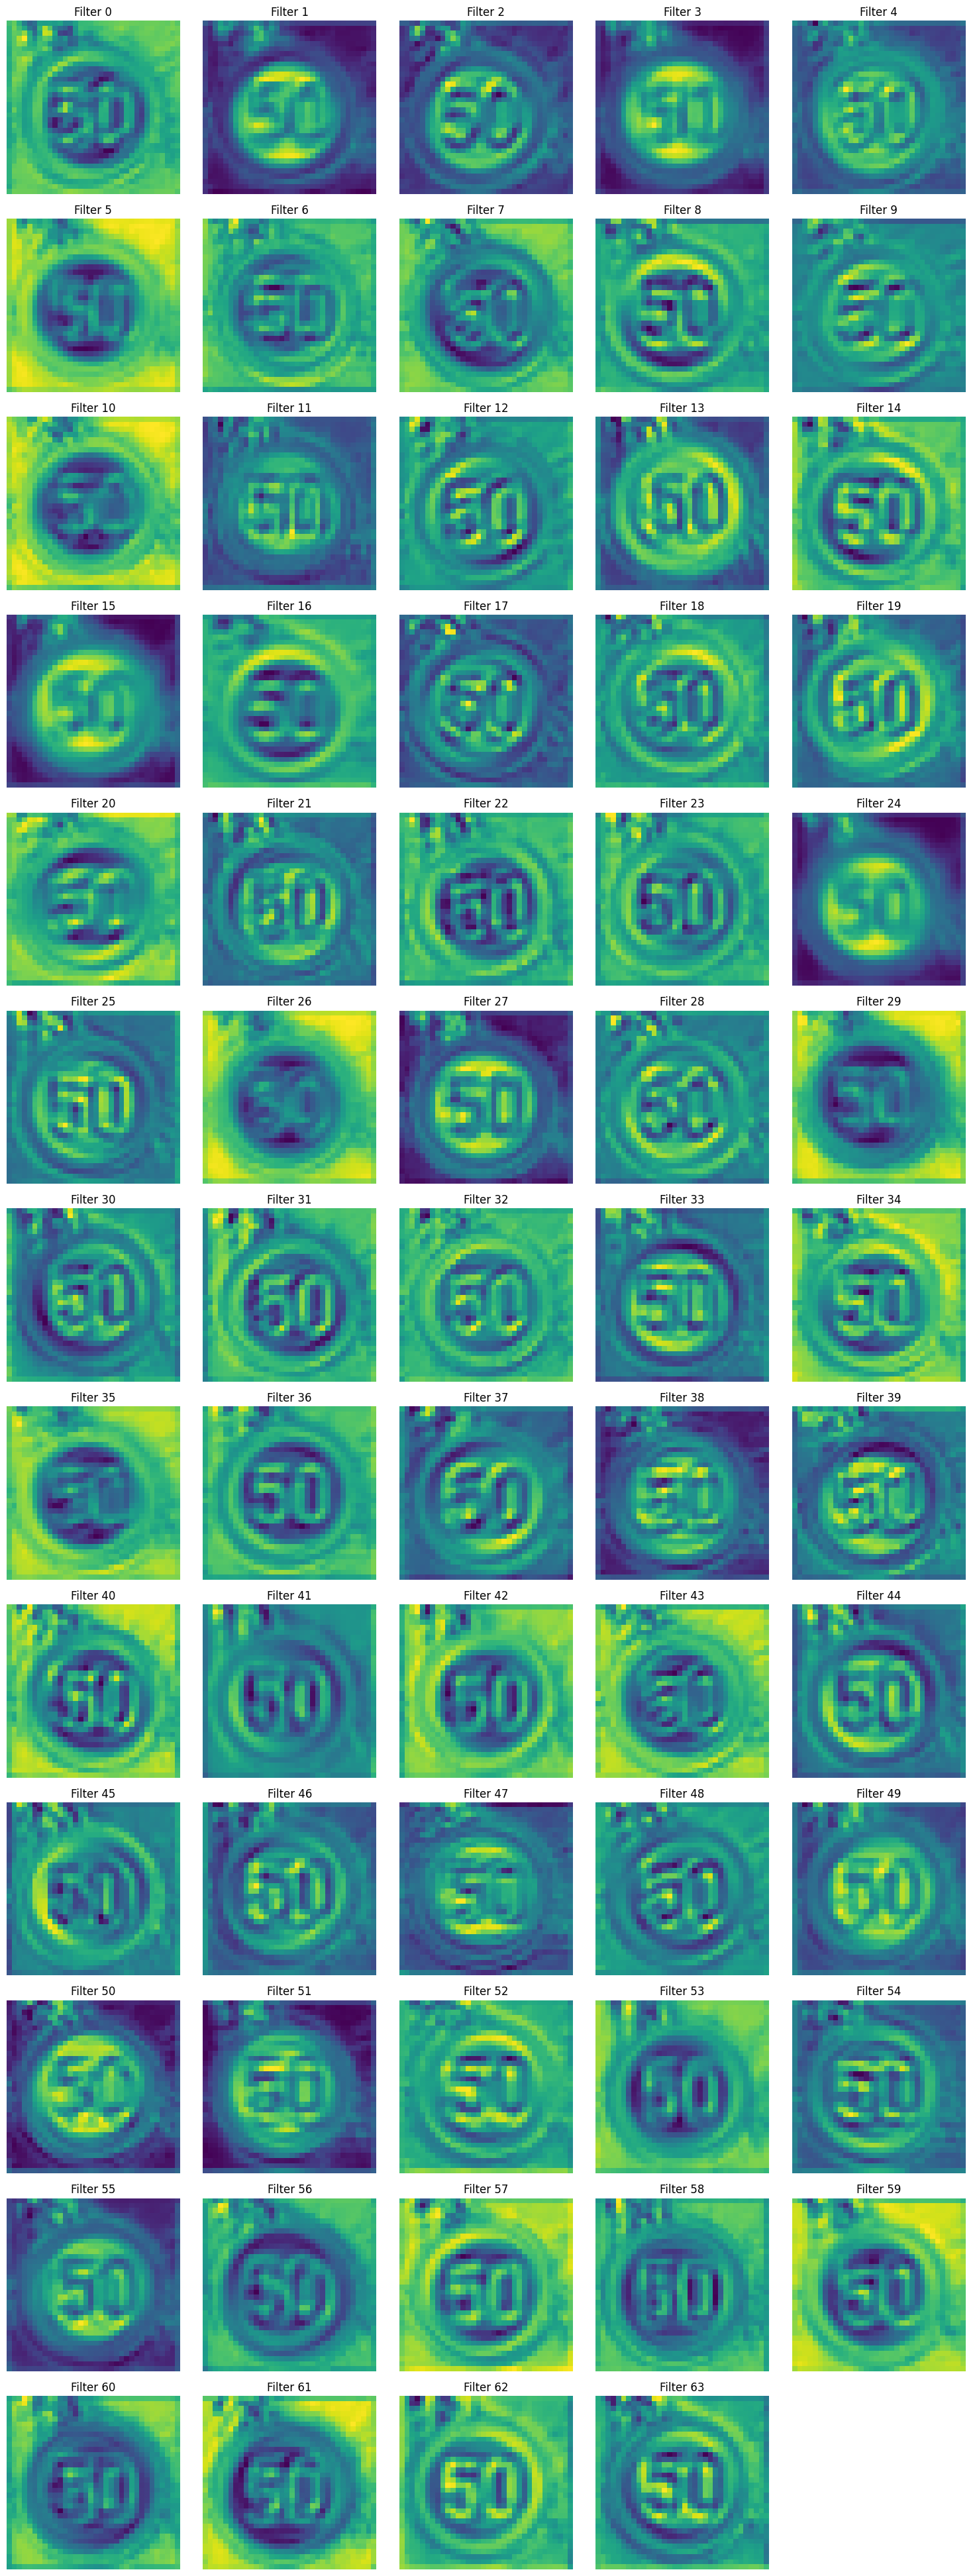

In [32]:
import math
import matplotlib.pyplot as plt

# Aktivierungen abrufen
act = activations['conv_layer1']
print(f"Shape of conv1 activations: {act.shape}")

# Filter-Anzahl
num_filters = act.shape[1]

# Dynamische Subplots
rows = math.ceil(num_filters / 5)
fig, axes = plt.subplots(rows, 5, figsize=(15, rows * 3))

for idx in range(num_filters):
    row = idx // 5
    col = idx % 5
    axes[row, col].imshow(act[0, idx].detach().cpu(), cmap='viridis')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Filter {idx}')

# Unbenutzte Subplots entfernen (falls nötig)
for idx in range(num_filters, rows * 5):
    row = idx // 5
    col = idx % 5
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


### Activation Maximazation

In [33]:
def activation_maximization(model, layer_name, filter_index, input_size=(1, 3, 35, 35), lr=0.1, iterations=30):
    device = next(model.parameters()).device  # Gerät des Modells (CPU oder GPU)
    
    # Initialisierung der Eingabe
    input_image = torch.randn(input_size, requires_grad=True, device=device)  # Auf das richtige Gerät legen
    
    optimizer = optim.Adam([input_image], lr=lr, weight_decay=1e-6)
    activations = {}

    # Hook-Funktion für die gewünschte Schicht
    def hook_function(module, input, output):
        activations[layer_name] = output

    # Hook registrieren
    layer = dict(model.named_modules())[layer_name]
    hook = layer.register_forward_hook(hook_function)

    for i in range(iterations):
        optimizer.zero_grad()
        model(input_image)  # Modell auf dem richtigen Gerät ausführen
        act = activations[layer_name][0, filter_index]
        loss = -torch.mean(act)  # Aktivierung maximieren
        loss.backward()
        optimizer.step()
        # Eingabewerte beschränken
        input_image.data = torch.clamp(input_image.data, 0, 1)
        if (i + 1) % 10 == 0:
            print(f"Iteration {i+1}/{iterations}, Loss: {-loss.item():.4f}")

    hook.remove()
    return input_image.detach()



Generating image for relu1 filter 0
Iteration 10/30, Loss: 0.0813
Iteration 20/30, Loss: 0.1085
Iteration 30/30, Loss: 0.1126

Generating image for relu1 filter 1
Iteration 10/30, Loss: 0.7556
Iteration 20/30, Loss: 0.8651
Iteration 30/30, Loss: 0.8679

Generating image for relu1 filter 2
Iteration 10/30, Loss: 0.5018
Iteration 20/30, Loss: 0.5824
Iteration 30/30, Loss: 0.5933

Generating image for relu1 filter 3
Iteration 10/30, Loss: 1.3942
Iteration 20/30, Loss: 1.5614
Iteration 30/30, Loss: 1.5615

Generating image for relu1 filter 4
Iteration 10/30, Loss: 0.4327
Iteration 20/30, Loss: 0.5011
Iteration 30/30, Loss: 0.5075

Generating image for relu1 filter 5
Iteration 10/30, Loss: 0.1251
Iteration 20/30, Loss: 0.1689
Iteration 30/30, Loss: 0.1791

Generating image for relu1 filter 6
Iteration 10/30, Loss: 0.1040
Iteration 20/30, Loss: 0.1322
Iteration 30/30, Loss: 0.1384

Generating image for relu1 filter 7
Iteration 10/30, Loss: 0.2548
Iteration 20/30, Loss: 0.4280
Iteration 30/3

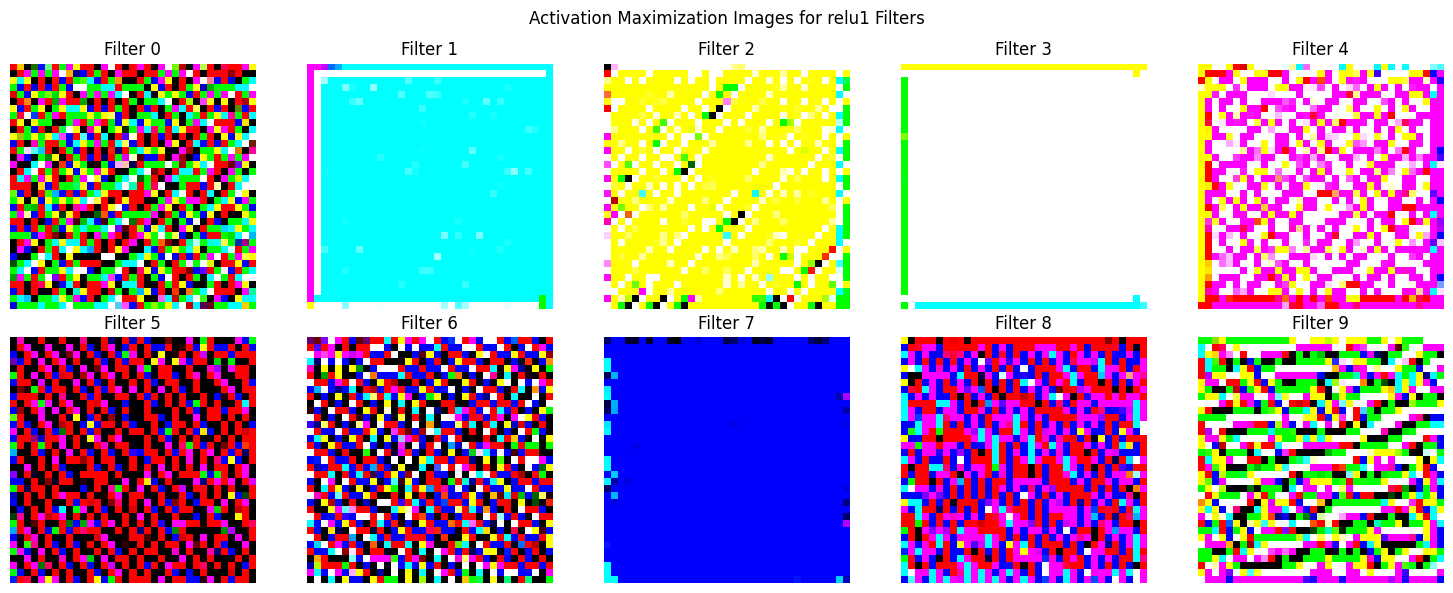

In [34]:
conv_layer1num_filters_relu1 = model.conv_layer1.out_channels
am_images_relu1 = []

for filter_idx in range(conv_layer1num_filters_relu1):
    print(f"\nGenerating image for relu1 filter {filter_idx}")
    am_image = activation_maximization(model, 'relu1', filter_idx, input_size=(1, 3, 35, 35), lr=0.1, iterations=30)
    am_images_relu1.append(am_image)

print("\nCompleted activation maximization for relu1.")

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for idx, am_image in enumerate(am_images_relu1[:10]):  # Maximal 10 Bilder anzeigen
    row = idx // 5
    col = idx % 5
    axes[row, col].imshow(am_image.squeeze().permute(1, 2, 0).cpu().numpy())  # RGB-Bild darstellen
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Filter {idx}')

plt.suptitle('Activation Maximization Images for relu1 Filters')
plt.tight_layout()
plt.show()



Generating image for relu2 filter 0
Iteration 10/30, Loss: 0.0000
Iteration 20/30, Loss: 0.0000
Iteration 30/30, Loss: 0.0000

Generating image for relu2 filter 1
Iteration 10/30, Loss: 0.3656
Iteration 20/30, Loss: 0.4607
Iteration 30/30, Loss: 0.4944

Generating image for relu2 filter 2
Iteration 10/30, Loss: 0.0369
Iteration 20/30, Loss: 0.0775
Iteration 30/30, Loss: 0.1059

Generating image for relu2 filter 3
Iteration 10/30, Loss: 0.2530
Iteration 20/30, Loss: 0.3456
Iteration 30/30, Loss: 0.3783

Generating image for relu2 filter 4
Iteration 10/30, Loss: 0.1827
Iteration 20/30, Loss: 0.2913
Iteration 30/30, Loss: 0.3283

Generating image for relu2 filter 5
Iteration 10/30, Loss: 0.0161
Iteration 20/30, Loss: 0.0356
Iteration 30/30, Loss: 0.0473

Generating image for relu2 filter 6
Iteration 10/30, Loss: 0.1604
Iteration 20/30, Loss: 0.2911
Iteration 30/30, Loss: 0.3404

Generating image for relu2 filter 7
Iteration 10/30, Loss: 0.5969
Iteration 20/30, Loss: 0.7220
Iteration 30/3

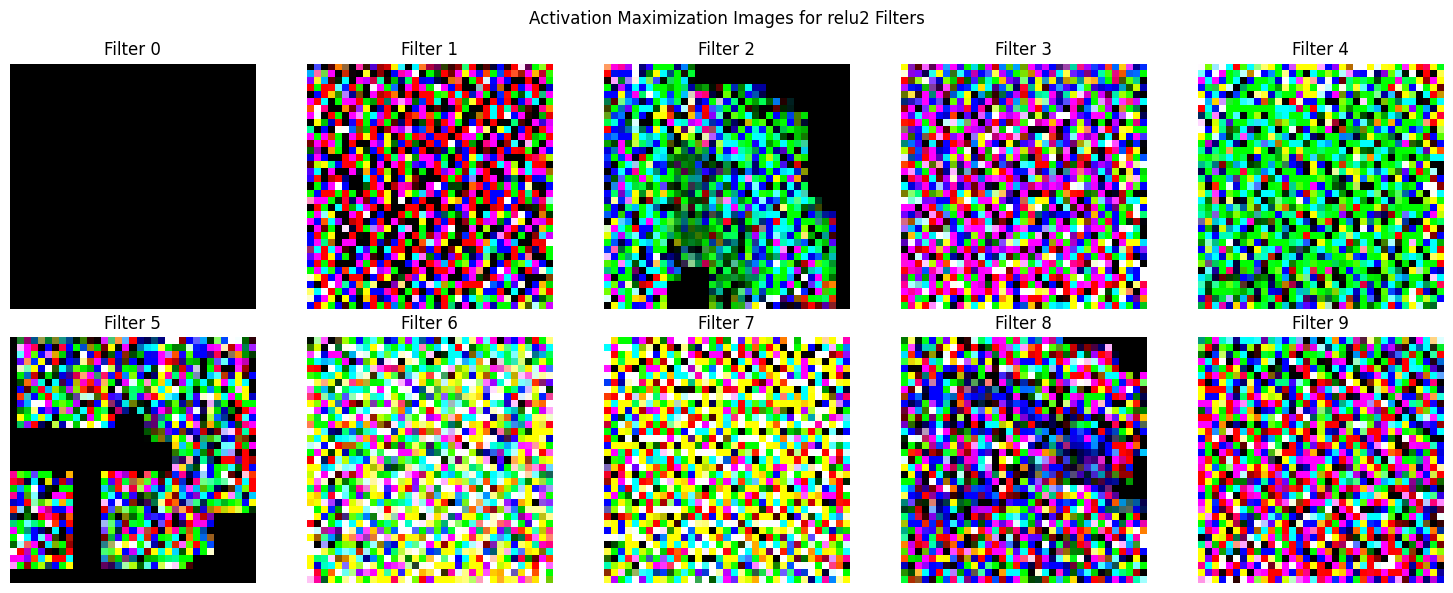

In [35]:
# ReLu 2

# Anzahl der Filter in der zweiten Schicht (ReLU2)
conv_layer2num_filters_relu2 = model.conv_layer2.out_channels
am_images_relu2 = []

# Aktivierungsmaximierung für alle Filter der ReLU2-Schicht
for filter_idx in range(conv_layer2num_filters_relu2):
    print(f"\nGenerating image for relu2 filter {filter_idx}")
    am_image = activation_maximization(
        model, 'relu2', filter_idx, input_size=(1, 3, 35, 35), lr=0.1, iterations=30
    )
    am_images_relu2.append(am_image)

print("\nCompleted activation maximization for relu2.")

# Darstellung der Ergebnisse
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Layout für 10 Filter

for idx, am_image in enumerate(am_images_relu2[:10]):  # Maximal 10 Bilder anzeigen
    row = idx // 5
    col = idx % 5
    axes[row, col].imshow(am_image.squeeze().permute(1, 2, 0).cpu().numpy())  # RGB-Bild
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Filter {idx}')

plt.suptitle('Activation Maximization Images for relu2 Filters')
plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1723866..3.9978275].


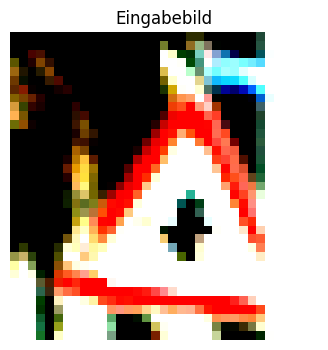

Shape der Aktivierung nach ReLU2: torch.Size([192, 15, 15])


ValueError: cannot reshape array of size 15 into shape (35,35)

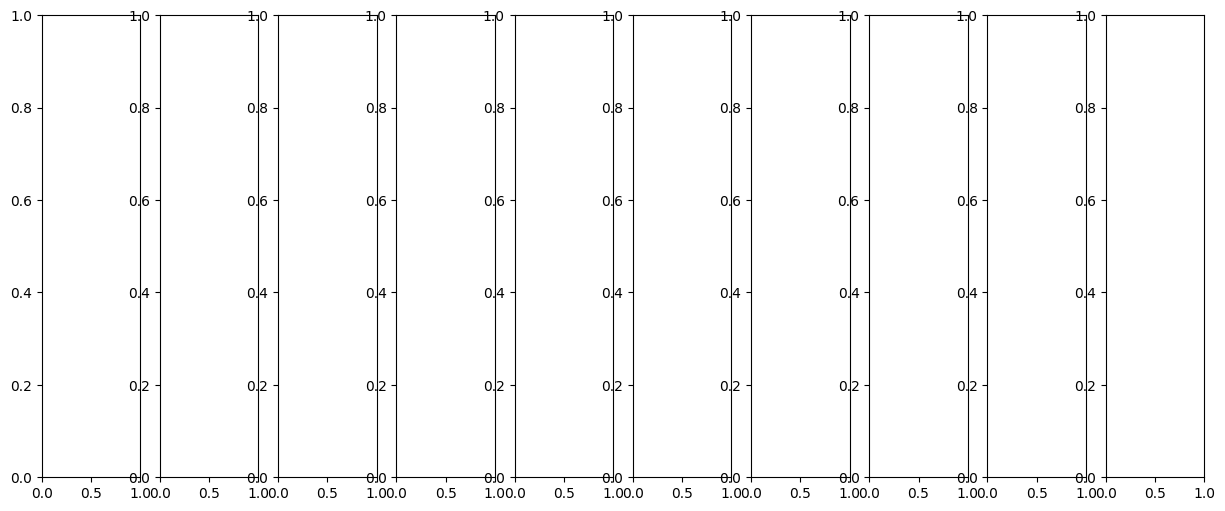

In [36]:
import torch
import matplotlib.pyplot as plt

# Dummy-Eingabebild erstellen (RGB-Bild, normalisiert zwischen 0 und 1) und auf das Gerät verschieben
img, label = test_dataset[4000]  # Zufälliges Bild (Channels, Height, Width)
input_image = img.to(device)  # Die Variable `img` sollte `input_image` zugewiesen werden.

# Weiterleitung durch die Schichten bis ReLU2
with torch.no_grad():
    out_conv1 = model.relu1(model.conv_layer1(input_image))  # Erste Schicht + ReLU
    out_pool1 = model.max_pool1(out_conv1)                  # Max-Pooling
    out_conv2 = model.relu2(model.conv_layer2(out_pool1))   # Zweite Schicht + ReLU

# Eingabebild visualisieren
plt.figure(figsize=(4, 4))
plt.imshow(img.permute(1, 2, 0).cpu())  # (C, H, W) -> (H, W, C) und auf CPU für die Darstellung
plt.axis('off')
plt.title("Eingabebild")
plt.show()

# Ausgabe-Shape der Aktivierung
print("Shape der Aktivierung nach ReLU2:", out_conv2.shape)

# Aktivierungskarten der ersten 10 Filter visualisieren
num_filters = min(10, out_conv2.shape[1])  # Zeige maximal 10 Filter
fig, axes = plt.subplots(1, num_filters, figsize=(15, 6))

for i in range(num_filters):
    activation_map = out_conv2[0, i].cpu().numpy()  # Aktivierung für Filter i
    
    # Falls die Aktivierungskarten 1D sind, reshape sie zu 2D (H, W)
    if activation_map.ndim == 1:
        activation_map = activation_map.reshape(35, 35)  # Beispiel für die Größe 35x35 (oder was du benötigst)
    
    axes[i].imshow(activation_map, cmap='viridis')
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i}')

plt.suptitle("Aktivierungskarten für ReLU2 (bestimmtes Bild)")
plt.tight_layout()
plt.show()


### Grad Cam

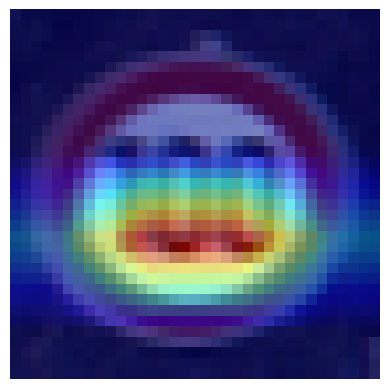

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms.functional import normalize
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F

def grad_cam(model, input_image, target_class, layer_name):
    model.eval()  

    # Dictionary to hold gradients and activations
    gradients = {}
    activations = {}

    # Hook to capture gradients
    def backward_hook(module, grad_input, grad_output):
        gradients[layer_name] = grad_output[0]

    # Hook to capture activations
    def forward_hook(module, input, output):
        activations[layer_name] = output

    # Register hooks on the desired layer
    layer = dict(model.named_modules())[layer_name]
    layer.register_forward_hook(forward_hook)
    layer.register_backward_hook(backward_hook)

    # Forward pass
    input_image = input_image.unsqueeze(0)  # Add batch dimension
    input_image = input_image.to(next(model.parameters()).device)  # Move to device
    output = model(input_image)

    # Backward pass for the target class
    model.zero_grad()
    target_score = output[0, target_class]
    target_score.backward()

    # Compute Grad-CAM
    grads = gradients[layer_name]  # Gradients from backward pass
    acts = activations[layer_name]  # Activations from forward pass
    pooled_grads = torch.mean(grads, dim=(2, 3))  # Global average pooling

    # Weight activations by pooled gradients
    acts = acts * pooled_grads.view(1, -1, 1, 1)  # Apply broadcasting

    # Average across the channels
    heatmap = torch.mean(acts, dim=1).squeeze().detach().cpu().numpy()

    # Normalize heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap


# Visualisierung der Grad-CAM
def show_grad_cam(image, heatmap, alpha=0.5):
    # Normalize image to [0, 1]
    image = (image - image.min()) / (image.max() - image.min())

    # Resize heatmap to match image dimensions using PyTorch
    heatmap_tensor = torch.tensor(heatmap).unsqueeze(0).unsqueeze(0)  # Add batch and channel dims
    heatmap_resized = F.interpolate(heatmap_tensor, size=image.shape[:2], mode='bilinear', align_corners=False)
    heatmap_resized = heatmap_resized.squeeze().numpy()  # Remove added dims
    heatmap_resized = np.uint8(255 * heatmap_resized)  # Scale heatmap to [0, 255]

    # Convert heatmap to RGB
    heatmap_colored = plt.cm.jet(heatmap_resized)[:, :, :3]  # Convert heatmap to RGB
    heatmap_colored = heatmap_colored / np.max(heatmap_colored)  # Normalize heatmap

    # Combine heatmap with original image
    overlay = alpha * heatmap_colored + (1 - alpha) * image
    overlay = overlay / np.max(overlay)  # Normalize overlay to [0, 1]

    # Plot the result
    plt.imshow(overlay)
    plt.axis('off')
    plt.show()


# Lade und transformiere ein Bild von einem Pfad
def load_image(image_path, input_size=(3, 35, 35)):
    transform = transforms.Compose([
        transforms.Resize((input_size[1], input_size[2])),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    original_image = np.array(image) / 255.0  
    image_tensor = transform(image)
    return image_tensor, original_image


image_path = "GTSRB/Final_Test/Images/100_kmh/00366.ppm"  # Beispielpfad
image_tensor, original_image = load_image(image_path)

# Zielklasse und Schicht
layer_name = "conv_layer5" 
target_class = 0  

heatmap = grad_cam(trained_model, image_tensor, target_class, layer_name)
show_grad_cam(original_image, heatmap)


### LIME

100%|██████████| 1000/1000 [00:07<00:00, 131.04it/s]


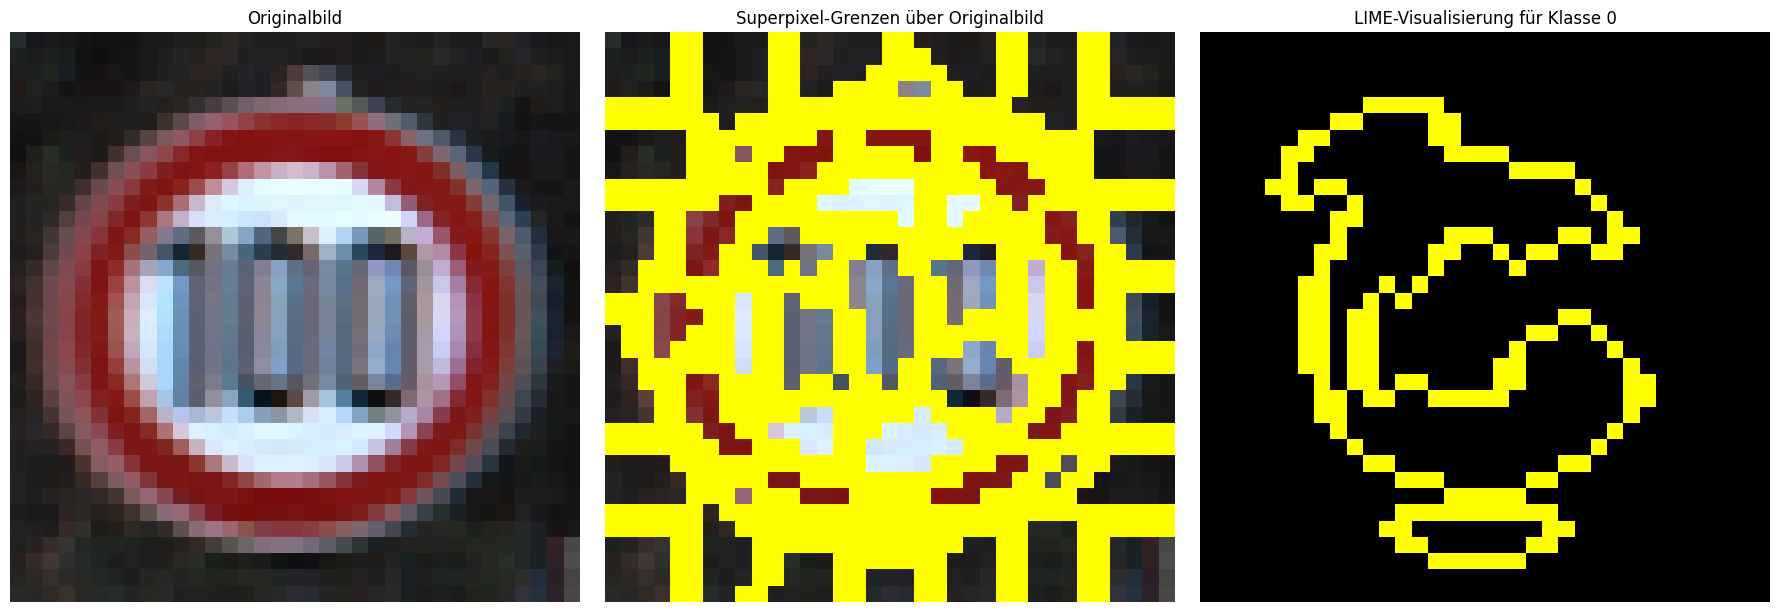

In [ ]:
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import mark_boundaries, slic
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
import numpy as np
from PIL import Image

def transform_image_for_model(image, model_input_size=(3, 35, 35)):

    transform = transforms.Compose([
        transforms.Resize((model_input_size[1], model_input_size[2])),
        transforms.ToTensor()
    ])
    return transform(image).unsqueeze(0)  

def predict_proba(images):
    """
    Wrapper-Funktion für LIME, um Modellvorhersagen für eine Reihe von Bildern zu generieren.
    """
    images_tensor = torch.stack([torch.tensor(image).permute(2, 0, 1) for image in images]).to(device)
    with torch.no_grad():
        outputs = trained_model(images_tensor)
        probs = torch.softmax(outputs, dim=1)
    return probs.cpu().numpy()

explainer = LimeImageExplainer()
#Image path
image_path = "GTSRB/Final_Test/Images/100_kmh/00366.ppm" 
example_image = Image.open(image_path)
transformed_image = transform_image_for_model(example_image).squeeze(0).permute(1, 2, 0).numpy()

def custom_segmentation(image):
    """
    Anpassen der Segmentierungsmethode für LIME.
    """
    return slic(image, n_segments=50, compactness=30, start_label=1)

explanation = explainer.explain_instance(
    transformed_image,
    predict_proba,
    top_labels=1,
    hide_color=0,
    num_samples=1000,
    segmentation_fn=custom_segmentation 
)

#Vis
label_to_explain = explanation.top_labels[0]  
temp, mask = explanation.get_image_and_mask(
    label=label_to_explain,
    positive_only=True,  
    hide_rest=False,     
    num_features=10,     
    min_weight=0.01      
)

segments = slic(transformed_image, n_segments=50, compactness=30, start_label=1)
boundaries_image = mark_boundaries(np.array(example_image) / 255.0, segments)

plt.figure(figsize=(18, 6))

# Originalbild
plt.subplot(1, 3, 1)
plt.imshow(example_image)
plt.title("Originalbild")
plt.axis("off")

# Superpixel-Grenzen 
plt.subplot(1, 3, 2)
plt.imshow(boundaries_image)
plt.title("Superpixel-Grenzen über Originalbild")
plt.axis("off")

# LIME-
plt.subplot(1, 3, 3)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title(f"LIME-Visualisierung für Klasse {label_to_explain}")
plt.axis("off")

plt.tight_layout()
plt.show()


Step 0, Loss: -1.5198
Step 20, Loss: -138.8262
Step 40, Loss: -159.4233
Step 60, Loss: -336.1649
Step 80, Loss: -117.2092
Step 100, Loss: -369.1788
Step 120, Loss: -229.9408
Step 140, Loss: -494.0568
Step 160, Loss: -424.6750
Step 180, Loss: -103.7551


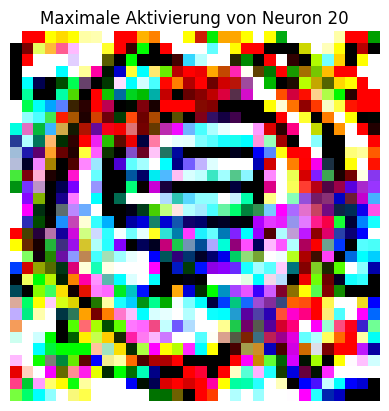

In [27]:
import torch
import torch.nn.functional as F
from torchvision.transforms import Normalize
import matplotlib.pyplot as plt

# Neuron auswählen
target_neuron = 20  # Index des gewünschten Neurons (z. B. in der letzten Fully Connected Layer)

# Zufälliges Startbild erzeugen
input_image = torch.randn(1, 3, 32, 32, requires_grad=True, device=device)  # Für 32x32 RGB-Bilder

# Optimizer
optimizer = torch.optim.Adam([input_image], lr=0.1)

# Normalisierung (optional, falls dein Modell normalisierte Eingaben erwartet)
normalize = Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

# Optimierung
for step in range(200):  # Anzahl der Schritte für die Optimierung
    optimizer.zero_grad()

    # Vorwärtsdurchlauf
    normalized_input = normalize(input_image)
    outputs = trained_model(normalized_input)

    # Ziel: Maximierung der Aktivierung des gewählten Neurons
    loss = -outputs[0, target_neuron]  # Negative Aktivierung (für Maximierung)
    loss.backward()
    optimizer.step()

    # Regularisierung (z. B. Begrenzung der Pixelwerte)
    with torch.no_grad():
        input_image.clamp_(0, 1)  # Pixelwerte zwischen 0 und 1 halten

    # Fortschritt anzeigen
    if step % 20 == 0:
        print(f"Step {step}, Loss: {loss.item():.4f}")

# Visualisierung des optimierten Bildes
optimized_image = input_image.detach().cpu().squeeze().permute(1, 2, 0).numpy()
plt.imshow(optimized_image)
plt.title(f"Maximale Aktivierung von Neuron {target_neuron}")
plt.axis("off")
plt.show()
